<a href="https://colab.research.google.com/github/Raghakeerthana/Restaurant_recommender/blob/main/final_rrs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import squarify
sns.set_theme()

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Classroom/II AIML B Principles of Artificial Intelligence/data set/TripAdvisor_RestauarantRecommendation.csv.zip')
df.head()

,Name,Street Address,Location,Type,Reviews,No of Reviews,Comments,Contact Number,Trip_advisor Url,Menu,Price_Range
0,Betty Lou's Seafood and Grill,318 Columbus Ave,"San Francisco, CA 94133-3908","Seafood, Vegetarian Friendly, Vegan Options",4.5 of 5 bubbles,243 reviews,NaN,+1 415-757-0569,https://www.tripadvisor.com//Restaurant_Review...,Check The Website for a Menu,$$ - $$$
1,Coach House Diner,55 State Rt 4,"Hackensack, NJ 07601-6337","Diner, American, Vegetarian Friendly",4 of 5 bubbles,84 reviews,"Both times we were there very late, after 11 P...",+1 201-488-4999,https://www.tripadvisor.com//Restaurant_Review...,Check The Website for a Menu,$$ - $$$
2,Table Talk Diner,2521 South Rd Ste C,"Poughkeepsie, NY 12601-5476","American, Diner, Vegetarian Friendly",4 of 5 bubbles,256 reviews,Waitress was very friendly but a little pricey...,+1 845-849-2839,https://www.tripadvisor.com//Restaurant_Review...,http://tabletalkdiner.com/menu/breakfast/,$$ - $$$
3,Sixty Vines,3701 Dallas Pkwy,"Plano, TX 75093-7777","American, Wine Bar, Vegetarian Friendly",4.5 of 5 bubbles,235 reviews,Not sure why I went there for the second time....,+1 469-620-8463,https://www.tripadvisor.com//Restaurant_Review...,https://sixtyvines.com/menu/plano-tx/,$$ - $$$
4,The Clam Bar,3914 Brewerton Rd,"Syracuse, NY 13212","American, Bar, Seafood",4 of 5 bubbles,285 reviews,Doesn't look like much from the outside but wa...,+1 315-458-1662,https://www.tripadvisor.com//Restaurant_Review...,Check The Website for a Menu,$$ - $$$


In [ ]:
df.columns

Index(['Name', 'Street Address', 'Location', 'Type', 'Reviews',
       'No of Reviews', 'Comments', 'Contact Number', 'Trip_advisor Url',
       'Menu', 'Price_Range'],
      dtype='object')

In [ ]:
df.drop(['Contact Number', 'Trip_advisor Url', 'Menu', 'Comments'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3062 entries, 0 to 3061
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            3062 non-null   object
 1   Street Address  3062 non-null   object
 2   Location        3062 non-null   object
 3   Type            3049 non-null   object
 4   Reviews         3062 non-null   object
 5   No of Reviews   3062 non-null   object
 6   Price_Range     3062 non-null   object
dtypes: object(7)
memory usage: 167.6+ KB


In [ ]:
df.dropna(inplace=True, axis=0)
df.reset_index(drop=True, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3049 entries, 0 to 3048
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            3049 non-null   object
 1   Street Address  3049 non-null   object
 2   Location        3049 non-null   object
 3   Type            3049 non-null   object
 4   Reviews         3049 non-null   object
 5   No of Reviews   3049 non-null   object
 6   Price_Range     3049 non-null   object
dtypes: object(7)
memory usage: 166.9+ KB


In [ ]:
df['City'] = [c.split(',')[0].strip() for c in df.Location]
df['State'] = [s.split(',')[1][:3].strip() if len(s.split(',')) == 2 else s.split(',')[2][:3].strip() for s in df.Location]

In [ ]:
df['State'].value_counts()

NY    649
TX    612
CA    609
WA    606
NJ    561
PA      9
OR      2
        1
Name: State, dtype: int64

In [ ]:
df[df['State'] == ""]

,Name,Street Address,Location,Type,Reviews,No of Reviews,Price_Range,City,State
2605,The Watermark,6361 Fallsview Blvd,"Niagara Falls, Ontario L2G 3V9,","American, Canadian, Contemporary",4 of 5 bubbles,"1,342 reviews",$$$$,Niagara Falls,


In [ ]:
df.drop(df[(df['State'] == 'PA') | (df['State'] == 'OR') | (df['State'] == '')].index, inplace=True)
df.drop('Location', axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)

In [ ]:
df['Price_Range'].value_counts()

$$ - $$$    2373
$$$$         382
$            281
American       1
Name: Price_Range, dtype: int64

In [ ]:
df[df['Price_Range'] == 'American']


,Name,Street Address,Type,Reviews,No of Reviews,Price_Range,City,State
1567,SPIN San Francisco,690 Folsom St,"Pizza, Grill, Pub",4 of 5 bubbles,22 reviews,American,San Francisco,CA


In [ ]:
df.iloc[1567]

Name              SPIN San Francisco
Street Address         690 Folsom St
Type               Pizza, Grill, Pub
Reviews               4 of 5 bubbles
No of Reviews             22 reviews
Price_Range                 American
City                   San Francisco
State                             CA
Name: 1567, dtype: object

In [ ]:
df['Price_Range'] = ['Cheap' if p == '$' else 'Moderate' if p == '$$ - $$$' else 'Expensive' for p in df.Price_Range]

In [ ]:
df['Price_Range'].value_counts()

Moderate     2373
Expensive     383
Cheap         281
Name: Price_Range, dtype: int64

In [ ]:
df['Reviews'] = [r.split()[0] for r in df.Reviews]
df['Reviews'] = df['Reviews'].astype('float')
df['No of Reviews'] = [n.split()[0].replace(',', '') for n in df['No of Reviews']]
df['No of Reviews'] = df['No of Reviews'].astype('int')

In [ ]:
df.head()

,Name,Street Address,Type,Reviews,No of Reviews,Price_Range,City,State
0,Betty Lou's Seafood and Grill,318 Columbus Ave,"Seafood, Vegetarian Friendly, Vegan Options",4.5,243,Moderate,San Francisco,CA
1,Coach House Diner,55 State Rt 4,"Diner, American, Vegetarian Friendly",4.0,84,Moderate,Hackensack,NJ
2,Table Talk Diner,2521 South Rd Ste C,"American, Diner, Vegetarian Friendly",4.0,256,Moderate,Poughkeepsie,NY
3,Sixty Vines,3701 Dallas Pkwy,"American, Wine Bar, Vegetarian Friendly",4.5,235,Moderate,Plano,TX
4,The Clam Bar,3914 Brewerton Rd,"American, Bar, Seafood",4.0,285,Moderate,Syracuse,NY


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3037 entries, 0 to 3036
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            3037 non-null   object 
 1   Street Address  3037 non-null   object 
 2   Type            3037 non-null   object 
 3   Reviews         3037 non-null   float64
 4   No of Reviews   3037 non-null   int64  
 5   Price_Range     3037 non-null   object 
 6   City            3037 non-null   object 
 7   State           3037 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 189.9+ KB


In [ ]:
df.describe()

,Reviews,No of Reviews
count,3037.000000,3037.000000
mean,4.331413,313.867303
std,0.268997,426.638357
min,3.000000,5.000000
25%,4.000000,95.000000
50%,4.500000,194.000000
75%,4.500000,353.000000
max,5.000000,5448.000000


In [ ]:
df.corr()

,Reviews,No of Reviews
Reviews,1.000000,0.078844
No of Reviews,0.078844,1.000000


Text(0.5, 1.0, 'No of Restaurants by State')

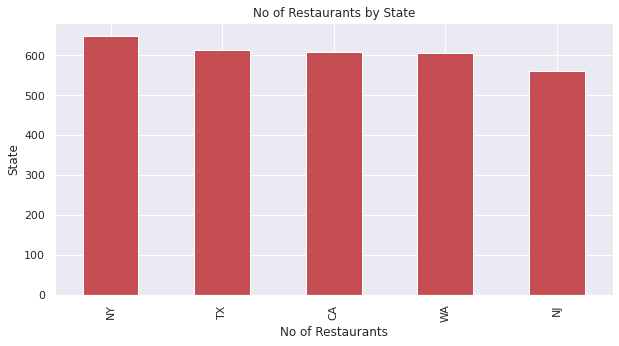

In [ ]:
ax = df['State'].value_counts().plot(kind='bar', figsize=(10,5), color='r')
ax.set_xlabel('No of Restaurants')
ax.set_ylabel('State')
ax.set_title('No of Restaurants by State')

Text(0.5, 1.0, 'No of Restaurants by City')

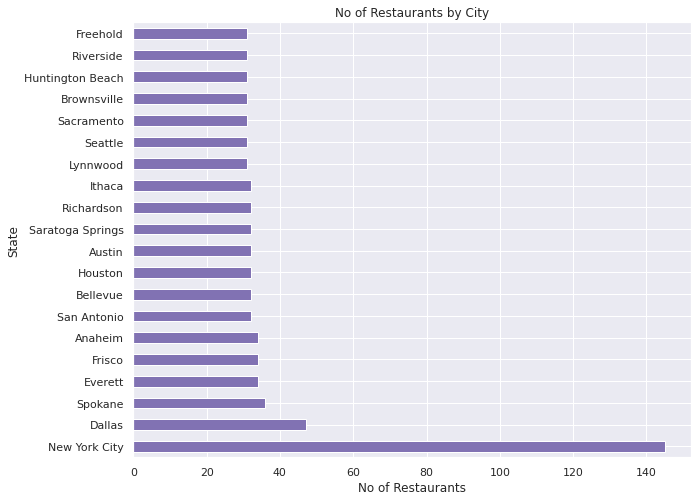

In [ ]:
ax = df['City'].value_counts()[:20].plot(kind='barh', figsize=(10,8), color='m')
ax.set_xlabel('No of Restaurants')
ax.set_ylabel('State')
ax.set_title('No of Restaurants by City')

In [ ]:
# Create set of all unique Types
types = []
for i in df.Type:
    for s in i.split(','):
        types.append(s.strip())
types = set(types)

In [ ]:
# Create Dict of Types + Frequency
type_count = {}
for i in df.Type:
    for s in i.split(','):
        if s.strip() in type_count.keys():
            type_count[s.strip()] += 1
        else:
            type_count[s.strip()] = 1

In [ ]:
#Convert Type_count dict into DataFrame
df_type = pd.DataFrame(type_count, index = [0])
df_type = df_type.transpose()
df_type.columns = ['No of Restaurants']
df_type.sort_values(by=['No of Restaurants'], ascending=False, inplace = True)

In [ ]:
# Create DataFrame with top 20 types + the total sum of all other types
df_type_top = df_type[:20]
other = pd.DataFrame({'No of Restaurants' : sum(df_type['No of Restaurants'][20:])}, index=[0])
other.rename(index={0:'Other'}, inplace=True)
df_type_top = pd.concat([df_type_top, other], axis=0)
df_type_top.sort_values(by=['No of Restaurants'], ascending=False, inplace = True)
df_type_top


,No of Restaurants
American,1552
Vegetarian Friendly,1534
Other,1271
Italian,572
Bar,558
Vegan Options,413
Seafood,304
Asian,278
Gluten Free Options,269
Pizza,251


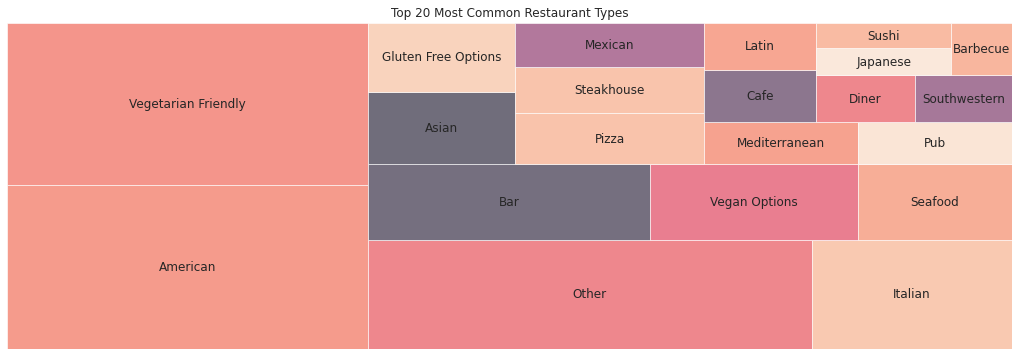

In [ ]:
# Plot top 20 Types on Treemap
fig, ax = plt.subplots(figsize=(18,6))
sns.set_style(style="whitegrid") # set seaborn plot style
ax = squarify.plot(sizes=df_type_top['No of Restaurants'], label=df_type_top.index, alpha=0.6).set(title='Top 20 Most Common Restaurant Types')
plt.axis('off')
plt.show()

In [ ]:
typeAverageReview = {}
for t in types:
    if len(df[df['Type'].str.contains(t) == True]) >=  30:
        typeAverageReview[t] = df[df['Type'].str.contains(t) == True]['Reviews'].mean()

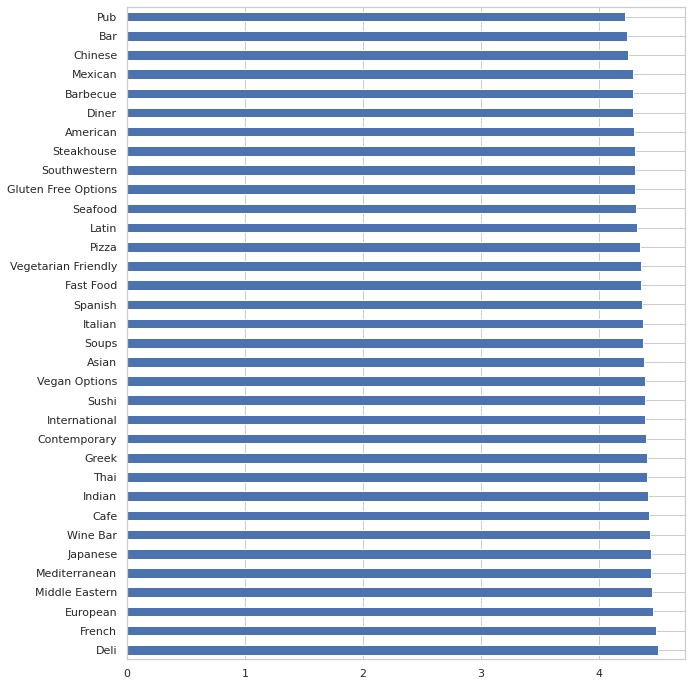

In [ ]:
pd.Series(typeAverageReview).sort_values(ascending=False).plot(kind='barh', figsize=(10,12), bottom=[3])

Text(0.5, 1.0, 'Review Scores by Price Range')

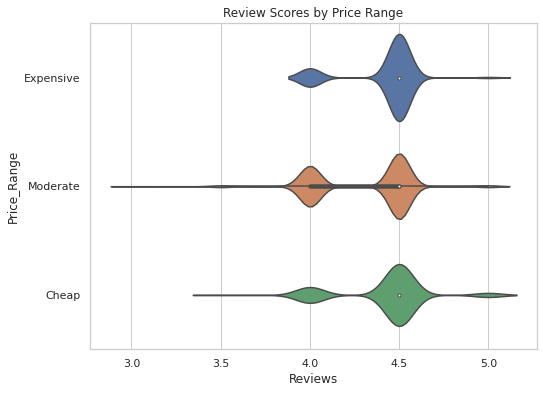

In [ ]:
fig, ax = plt.subplots(figsize = (8,6))
ax = sns.violinplot(data=df, x='Reviews', y='Price_Range', order=['Expensive', 'Moderate', 'Cheap'])
ax.set_title('Review Scores by Price Range')